In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
%cd /content/gdrive/My Drive/Colab Notebooks/Scene

/content/gdrive/My Drive/Colab Notebooks/Scene


In [11]:
# Importing libraries
import cv2
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

In [12]:
# Reading csv file (images with labels)
train_labels = pd.read_csv('train-scene classification/train.csv')

In [13]:
# Creating a list to store train-image paths 
file_paths = ['train-scene classification/train/{}'.format(file_name) for file_name in train_labels.loc[:,'image_name'].values]

In [14]:
# Reading images within list
images = [cv2.imread(file_path) for file_path in file_paths]

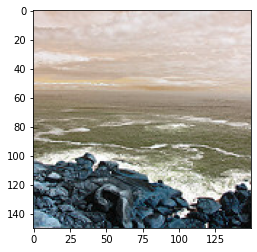

In [15]:
# Showing an original image
plt.imshow(images[4])

In [ ]:
# Resizing all images to 50x50
images = [cv2.resize(image,(50,50)) for image in images]

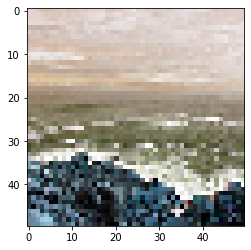

In [17]:
# Showing an image after resized
plt.imshow(images[4])

In [18]:
# Joining a sequence of arrays along a new axis.
X = np.stack(images)

In [19]:
# Reducing dimensions (3->1)
X = X.reshape(-1,50*50*3)

In [20]:
# Getting labels from dataframe
y = train_labels.loc[:,'label'].values

In [21]:
# Spliting file csv into train-set (80%) and test-set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Support vector machine with poly kernel
from sklearn.svm import SVC
classifier = SVC(kernel = "rbf")
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


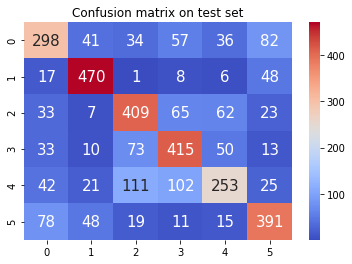

In [23]:
# Showwing the confusion matrix on test-set
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, classifier.predict(X_test))
plt.title('Confusion matrix on test set')
sns.heatmap(cm,annot=True,fmt='g',cmap='coolwarm',annot_kws={"size": 15})
plt.show()

In [24]:
# Showwing accuracy of SVM
y_test_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.59      0.54      0.57       548
           1       0.79      0.85      0.82       550
           2       0.63      0.68      0.66       599
           3       0.63      0.70      0.66       594
           4       0.60      0.46      0.52       554
           5       0.67      0.70      0.68       562

    accuracy                           0.66      3407
   macro avg       0.65      0.66      0.65      3407
weighted avg       0.65      0.66      0.65      3407

